# SKLearn K-Means Clustering

Steps:
1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

In [1]:
# Konversi data menjadi dataframe
import pandas as pd

df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [2]:
# Preprocessing data

# Rename nama kolom agar seragam
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})

# Ubah data kategorik menjadi numerik
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [5]:
X = df.drop(['CustomerID', 'gender'], axis=1)
X.head(3)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6


In [6]:
from sklearn.cluster import KMeans

# Membuat list inertia
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

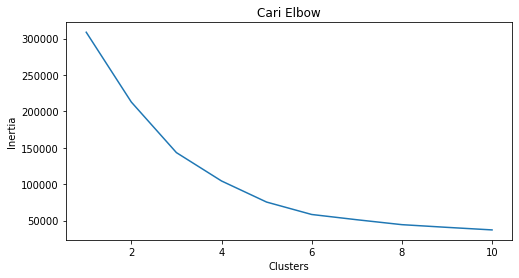

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Inertia plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

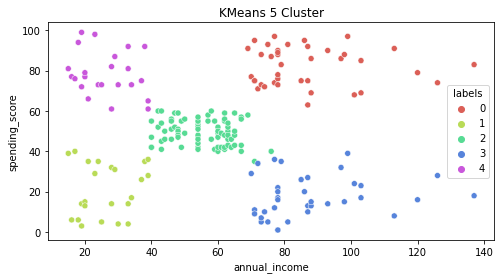

In [8]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan kolom label pada dataset
X['labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans 5 Cluster')
plt.show()